In [1]:
import numpy as np
import pandas as pd 
from importlib import reload
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx 
import json
import random 
import time

from src.Machine import Machine
from src.Job import Job
from src.Operation import Operation
from src.Agent import Agent
from src.Production_line import Production_line


from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam

def dsp(data, rows=10, columns=None):
    
    pd.options.display.max_rows = rows
    pd.options.display.max_columns = columns

    display(data)

    pd.options.display.max_rows = 15
    pd.options.display.max_columns = 20

In [2]:
prod_line = Production_line()
print(len(prod_line.create_action_space(14)))
optimizer = Adam(learning_rate=0.01)
agent = Agent(prod_line,optimizer)
job1 = Job("TEST1", 1,20000)
job2 = Job("TEST2", 1,20000)
job3 = Job("TEST3", 1,20000)
job4 = Job("TEST4", 1,20000)
job5 = Job("TEST5", 1,20000)
job6 = Job("TEST6", 1,20000)
job7 = Job("TEST7", 1,20000)
job8 = Job("TEST8", 1,20000)
job9 = Job("TEST9", 1,20000)
job10 = Job("TEST10", 1,20000)
job11 = Job("TEST11", 1,20000)
job12 = Job("TEST12", 1,20000)
job13 = Job("TEST13", 1,20000)
job14 = Job("TEST14", 1,20000)

prod_line.add_job(job1)
prod_line.add_job(job2)
prod_line.add_job(job3)
prod_line.add_job(job4)
prod_line.add_job(job5)
prod_line.add_job(job6)
prod_line.add_job(job7)
prod_line.add_job(job8)
prod_line.add_job(job9)
prod_line.add_job(job10)
prod_line.add_job(job11)
prod_line.add_job(job12)
prod_line.add_job(job13)
prod_line.add_job(job14)


with open("src/batch_description.json") as json_file:
    batch_description = json.load(json_file)
    
for key, value in batch_description["Batch_3.75_20000"].items():
    print(value["number"])

238
1
2
3
4
5
6
7
9
10
11
12
13
14


**to measure the execution time**

In [3]:
nbr = 1000

start = time.time()
for _ in range(nbr):
    agent.get_available_operation()
    
print('It took', (time.time()-start)/nbr, 'seconds.')


start = time.time()
for _ in range(nbr):
    agent.get_available_actions()
    
print('It took', (time.time()-start)/nbr, 'seconds.')

state_dict = prod_line.get_rl_formated_state("current")
for var in state_dict.values():
    print(var)

It took 7.38372802734375e-05 seconds.
It took 0.00031940627098083494 seconds.
0
2
12
True
0
1
60
False
0
1
2
False
0
2
60
False
0
4
12
False
0
2
60
False
0
3
14
False
4
0
0
False
0
4
10
False
0
1
60
False
0
2
60
False
0
4
60
False
0
1
60
False
0
1
60
False
0
2
12
True
0
1
60
False
0
1
2
False
0
2
60
False
0
4
12
False
0
2
60
False
0
3
14
False
4
0
0
False
0
4
10
False
0
1
60
False
0
2
60
False
0
4
60
False
0
1
60
False
0
1
60
False
0
2
12
True
0
1
60
False
0
1
2
False
0
2
60
False
0
4
12
False
0
2
60
False
0
3
14
False
4
0
0
False
0
4
10
False
0
1
60
False
0
2
60
False
0
4
60
False
0
1
60
False
0
1
60
False
0
2
12
True
0
1
60
False
0
1
2
False
0
2
60
False
0
4
12
False
0
2
60
False
0
3
14
False
4
0
0
False
0
4
10
False
0
1
60
False
0
2
60
False
0
4
60
False
0
1
60
False
0
1
60
False
0
2
12
True
0
1
60
False
0
1
2
False
0
2
60
False
0
4
12
False
0
2
60
False
0
3
14
False
4
0
0
False
0
4
10
False
0
1
60
False
0
2
60
False
0
4
60
False
0
1
60
False
0
1
60
False
0
2
12
True
0
1
60
False
0


In [4]:
start = time.time()
nbr = 1000
for i in range(nbr):
    agent.take_decision()
print('It took', (time.time()-start)/nbr, 'seconds.')

start = time.time()
agent.write_db('test.csv')
print('It took', (time.time()-start)/nbr, 'seconds.')


print(len(prod_line.get_action_space()))
test = prod_line.get_plateau_operation()

print(test.size)





C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


It took 0.002062936544418335 seconds.
It took 0.0006106929779052734 seconds.
238
196


In [5]:
planning = prod_line.get_gant_formated()

plan_df = pd.DataFrame()
for plan in planning:
    print(plan,"\n")
    df = pd.DataFrame(plan, columns =['Job','Machine', 'Operation', 'Start','Duration','Finish'])
    plan_df = pd.concat([plan_df, df], axis=0)

plan_df.reset_index(drop = True,inplace=True)

plan_df['Machine']= plan_df['Machine'].astype(str)
plan_df['Duration']= plan_df['Duration'].astype(int)




    
print(plan_df.dtypes)
print(plan_df)



[('TEST1', 2, 1, 11.0, 2.0, 13.0), ('TEST1', 3, 2, 35.0, 1.0, 36.0), ('TEST1', 5, 3, 37.0, 1.0, 38.0), ('TEST1', 6, 4, 79.0, 2.0, 81.0), ('TEST1', 1, 5, 81.0, 4.0, 85.0), ('TEST1', 3, 6, 85.0, 2.0, 87.0), ('TEST1', 8, 7, 5.0, 3.0, 8.0), ('TEST1', 9, 9, 180.0, 4.0, 184.0), ('TEST1', 10, 10, 184.0, 1.0, 185.0), ('TEST1', 11, 11, 186.0, 2.0, 188.0), ('TEST1', 12, 12, 190.0, 4.0, 194.0), ('TEST1', 13, 13, 194.0, 1.0, 195.0), ('TEST1', 14, 14, 199.0, 1.0, 200.0), ('TEST1', 8, 7, 45.0, 3.0, 48.0), ('TEST1', 2, 1, 32.0, 2.0, 34.0), ('TEST1', 5, 3, 42.0, 1.0, 43.0), ('TEST1', 4, 3, 50.0, 1.0, 51.0), ('TEST1', 5, 3, 52.0, 1.0, 53.0), ('TEST1', 4, 3, 54.0, 1.0, 55.0), ('TEST1', 4, 3, 57.0, 1.0, 58.0), ('TEST1', 5, 3, 64.0, 1.0, 65.0), ('TEST1', 8, 7, 95.0, 3.0, 98.0), ('TEST1', 4, 3, 78.0, 1.0, 79.0), ('TEST1', 8, 7, 140.0, 3.0, 143.0), ('TEST1', 3, 6, 149.0, 2.0, 151.0), ('TEST1', 8, 7, 165.0, 3.0, 168.0)] 

[('TEST2', 1, 1, 5.0, 2.0, 7.0), ('TEST2', 3, 2, 14.0, 1.0, 15.0), ('TEST2', 4, 3, 19.0

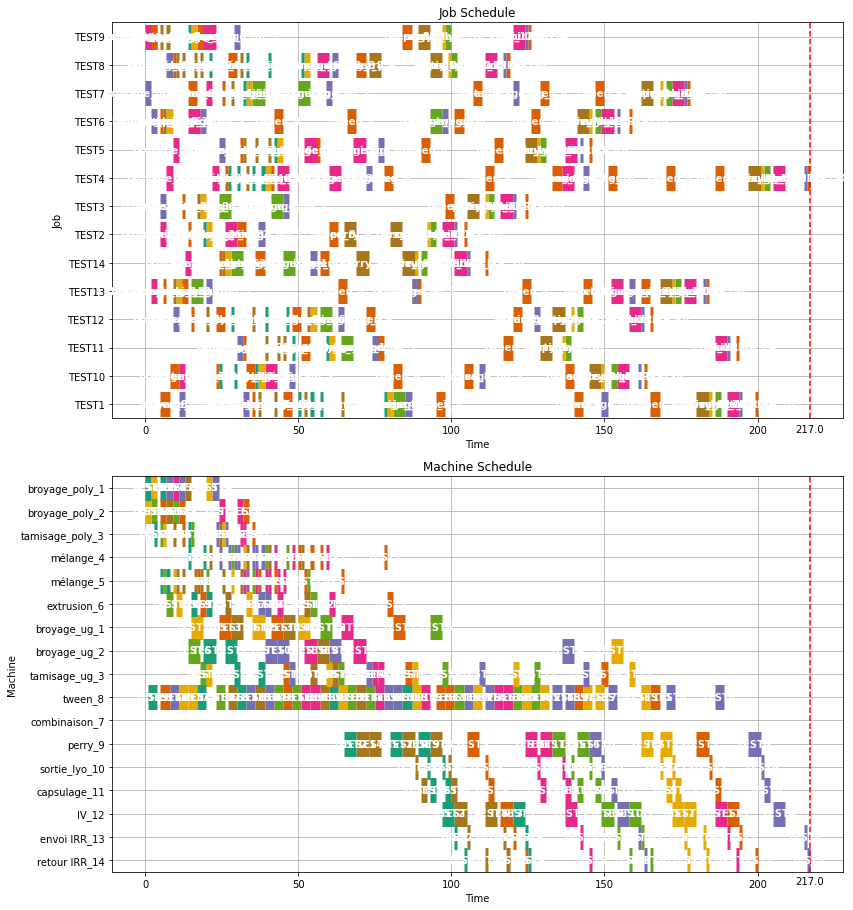

In [6]:
def visualize(results):
    
    operation_machine = {(1,1) : "broyage_poly_1",
                     (1,2) : "broyage_poly_2",
                     (2,3) : "tamisage_poly_3",
                     (3,4) : "mélange_4",
                     (3,5) : "mélange_5",
                     (4,6) : "extrusion_6",
                     (5,1) : "broyage_ug_1",
                     (5,2) : "broyage_ug_2",
                     (6,3) : "tamisage_ug_3",
                     (7,8) : "tween_8",
                     (8,7) : "combinaison_7",
                     (9,9) : "perry_9",
                     (10,10) : "sortie_lyo_10",
                     (11,11) : "capsulage_11",
                     (12,12) : "IV_12",
                     (13,13) : "envoi IRR_13",
                     (14,14) : "retour IRR_14"}
    
    schedule = results.copy()
    
    op_machine = []
    for row in schedule.iterrows():
        
        op = row[1]["Operation"]
        machine = row[1]["Machine"]
        op_machine.append(operation_machine[int(op),int(machine)])
    
    schedule["op_machine"] = op_machine
    
    JOBS = sorted(list(schedule['Job'].unique()))
    operation_machine_sorted = [value for key,value in operation_machine.items()][::-1]
    MACHINES = operation_machine_sorted
    makespan = schedule['Finish'].max()
    
    bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
    text_style = {'color':'white', 'weight':'bold', 'ha':'center', 'va':'center'}
    colors = mpl.cm.Dark2.colors

    schedule.sort_values(by=['Job', 'Start'])
    schedule.set_index(['Job', 'op_machine'], inplace=True,append = True)
    
    fig, ax = plt.subplots(2,1, figsize=(12, 5+(len(JOBS)+len(MACHINES))/4))

    for jdx, j in enumerate(JOBS, 1):
        for mdx, m in enumerate(MACHINES, 1):
            for index,_,_ in schedule.index:
                if (index,j,m) in schedule.index:
                    

                    xs = schedule.loc[(index,j,m), 'Start']
                    xf = schedule.loc[(index,j,m), 'Finish']
                    ax[0].plot([xs, xf], [jdx]*2, c=colors[mdx%7], **bar_style)
                    ax[0].text((xs + xf)/2, jdx, m, **text_style)
                    ax[1].plot([xs, xf], [mdx]*2, c=colors[jdx%7], **bar_style)
                    ax[1].text((xs + xf)/2, mdx, j, **text_style)
                
    ax[0].set_title('Job Schedule')
    ax[0].set_ylabel('Job')
    ax[1].set_title('Machine Schedule')
    ax[1].set_ylabel('Machine')
    
    for idx, s in enumerate([JOBS, MACHINES]):
        ax[idx].set_ylim(0.5, len(s) + 0.5)
        ax[idx].set_yticks(range(1, 1 + len(s)))
        ax[idx].set_yticklabels(s)
        ax[idx].text(makespan, ax[idx].get_ylim()[0]-0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
        ax[idx].plot([makespan]*2, ax[idx].get_ylim(), 'r--')
        ax[idx].set_xlabel('Time')
        ax[idx].grid(True)
        
    fig.tight_layout()
    
visualize(plan_df)

In [8]:
array = []
state = []
for i in range(40000):
    state.append(i)
nbr = 100 
start = time.time()
for _ in range(nbr):
    array.append(state)
    
print('It took', (time.time()-start)/nbr, 'seconds.')

print(array)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
index = [0,1,0,0,1,0,1]
test = [0,1,2,3,4,5,6]

print(np.where(index >0,test,-1))

TypeError: '>' not supported between instances of 'list' and 'int'